# Noise Creation Walkthrough

_Notebook was created by:_ Max Schmitz
_on:_ 11/03/2022

The data used in this research so far was

This file inverts data and then adds the noise on a couple of sample files to show the procedure. The used functions need to be still run on all files given.

This notebook will
1. load a 2D-FFT file with respective frequency and wavenumber grid
2. apply the inverse 2D-FFT to obtain the data in the _time $\times$ displacement_ domain (hopefully that is giving some meaningful results because I deleted the phase information and only the amplitude information is included now!!!)
3. add noise to the measurement in the time-displacement domain (figure out which noise and to which magnitude)
4. transform the data with noise from the time-displacement domain now back to the frequency-wavenumber domain with the 2D-FFT again


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pathlib
import matplotlib.pyplot as plt

from utils import load_2dfft_processed_data
from postprocess_2dfft_max_v15 import invert_2dfft, reapply_2dfft, add_noise # TODO: move this function to the utils file

In [3]:
def plot_contourf_fk(f_grid, k_grid, fft_data, title: str = 'put title here'):
    fig = plt.figure(1, dpi=300)
    ax = fig.gca()
    ax.contourf(f_grid, k_grid, fft_data, 300, cmap='Spectral', zorder=-40)
    plt.axis([0, 8000, 0, 2.5E7])
    plt.title(title)
    plt.xlabel('Wavenumber in 1/m')
    plt.ylabel('Frequency in Hz')

## 1. Load 2D-FFT file

In [4]:
# -- Specify folder to work in/where data lays
data_path = pathlib.Path().resolve() / '2dfft_data_selected' / '200._1._2._1._70'

# -- Specify file names for example file
fn = '11-09_19-25-13_max_analysis_job_disp_2dfft_fg_0.0002.csv'

fg, kg, abs_fft_data, sim_info = load_2dfft_processed_data(fn, data_path)
print('>> frequency-/wavenumber grid, 2D-FFT data, and simulation information file was loaded!')

>> frequency-/wavenumber grid, 2D-FFT data, and simulation information file was loaded!


Visualize the original 2D-FFT data

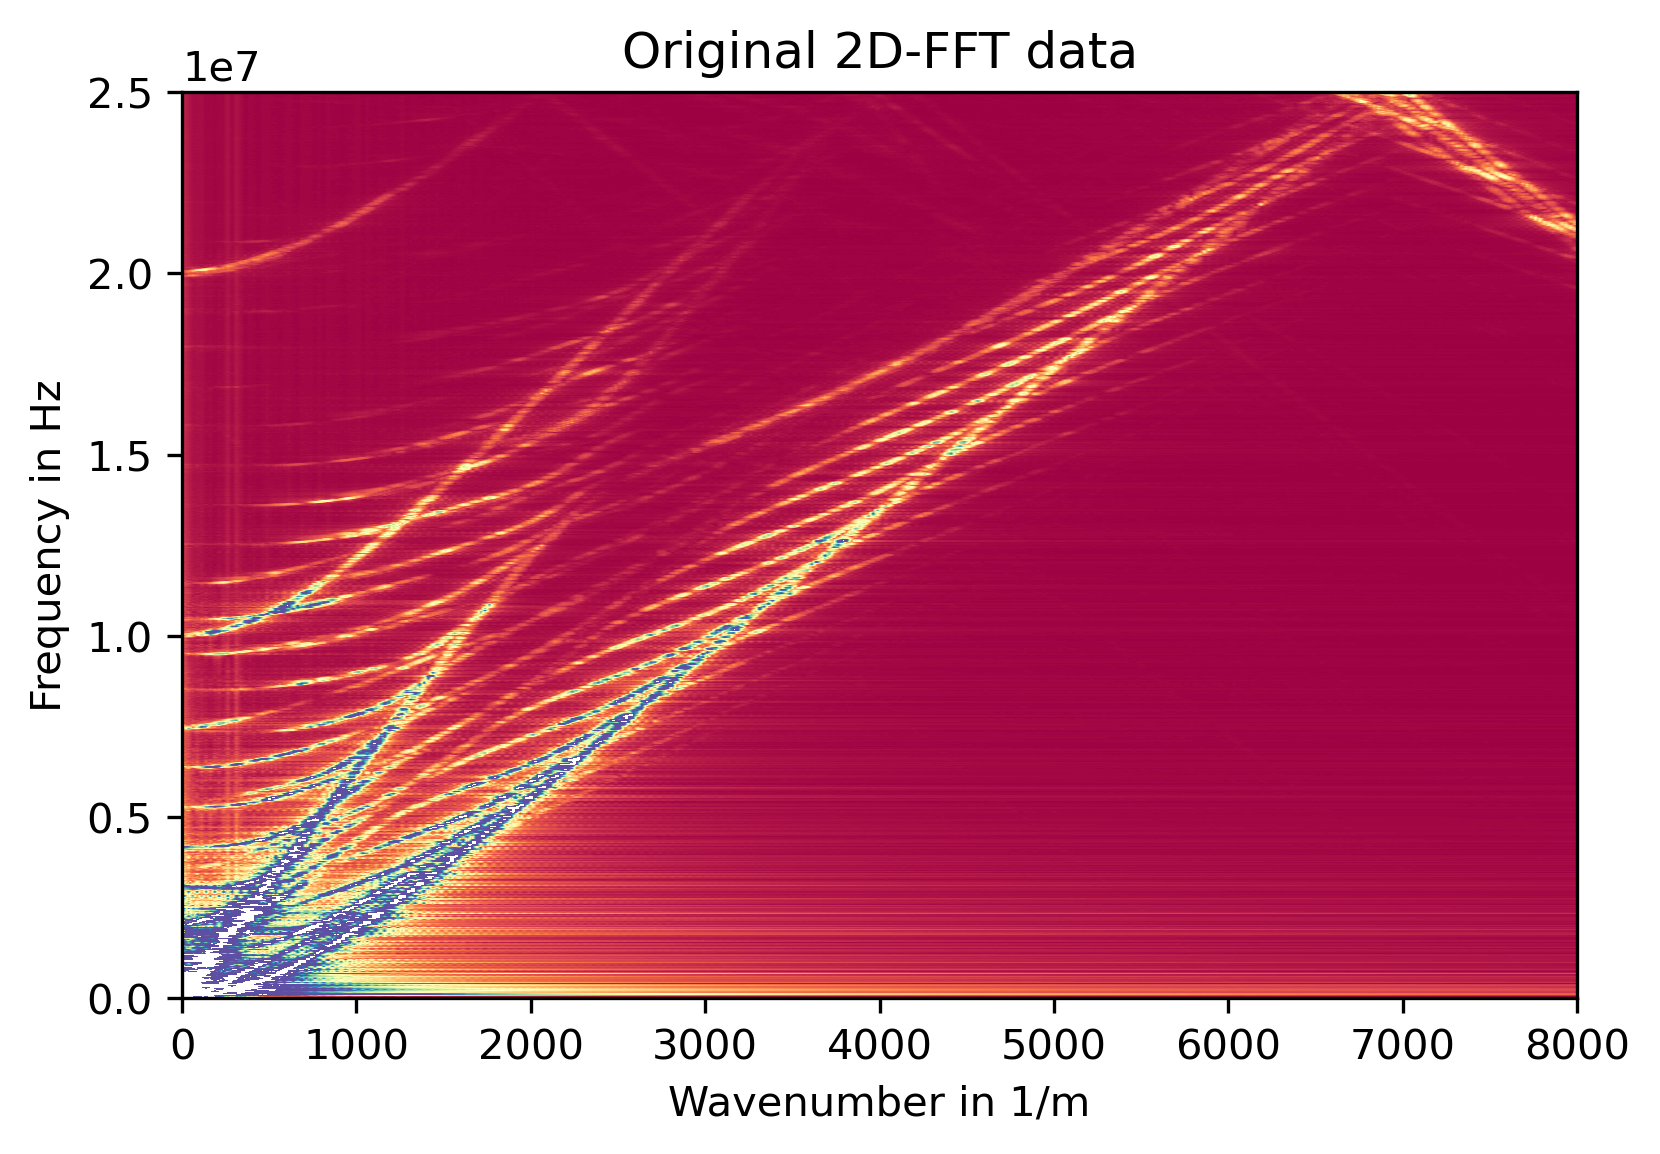

In [40]:
plot_contourf_fk(fg, kg, abs_fft_data, 'Original 2D-FFT data')

## 2. Apply inverse 2D-FFT

In [5]:
displacement_x_time, dt, dx, Nt, Nx = invert_2dfft(fg, kg, abs_fft_data, sim_info)
print('>> 2D-FFT data has been inverted to displacement-time data!')

## 3. Add noise to sampling

In [12]:
signal_to_noise_ratio_db = 80
displacement_x_time_n = add_noise(displacement_x_time, snr_db=signal_to_noise_ratio_db)
print(f'>> noise with SNR = {signal_to_noise_ratio_db} was added to displacement data!')

>> noise with SNR = 80 was added to displacement data!


## 4.Transform data back into frequency-wavenumber domain with 2D-FFT

In [10]:
fg_n, kg_n, abs_fft_data_n = reapply_2dfft(displacement_x_time_n, dt, dx, Nt, Nx)
print('>> noisy displacement data was transformed back to frequency-wavenumber domain!')

--- np 2dfft time: 0.4600191116333008 seconds ---
>> noisy displacement data was transformed back to frequency-wavenumber domain!


Visualize transformed 2D-FFT data together with original data

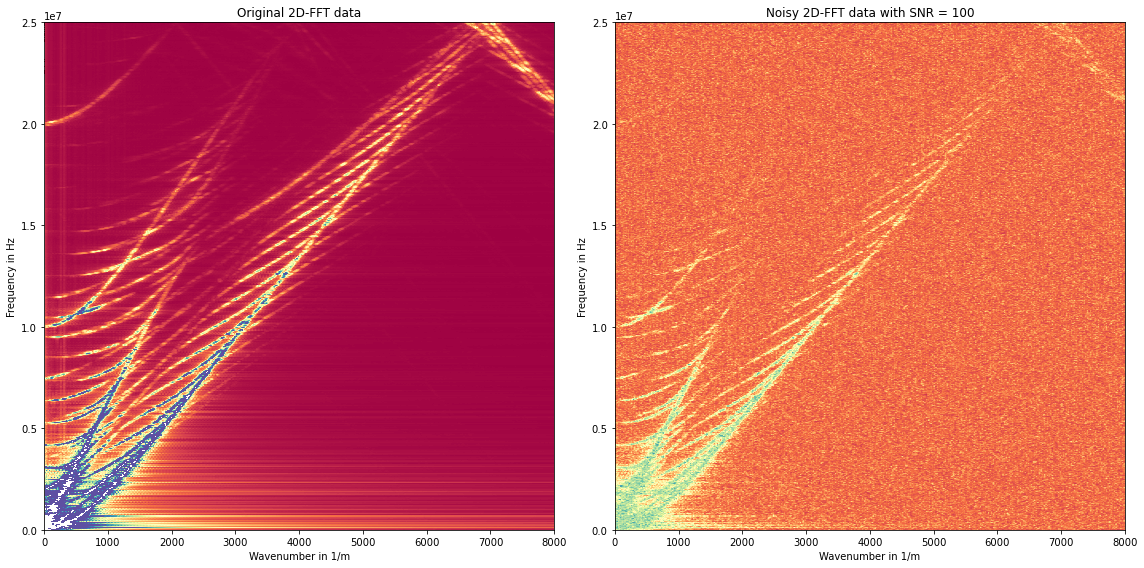

In [11]:
fig = plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_contourf_fk(fg, kg, abs_fft_data, 'Original 2D-FFT data')
plt.subplot(1, 2, 2)
plot_contourf_fk(fg, kg, abs_fft_data_n, f'Noisy 2D-FFT data with SNR = {signal_to_noise_ratio_db}')
plt.tight_layout()